In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

In [5]:
data_train = pd.read_csv('features_extracted_more.csv', index_col='id')

In [6]:
X, y = data_train.drop(columns=['y']), data_train['y']

In [7]:
X_ = X.replace(to_replace=np.inf, value=np.nan)

In [17]:
imputation_table = [-100 * i for i in range(1, len(X.columns ) + 1)]

<span style ="color: greenyellow; font-weight: bold"> Impute Values</span>

In [8]:
imputer = KNNImputer(n_neighbors=5, weights='distance')
imputed_data = imputer.fit_transform(X_)

X_imputed = pd.DataFrame(imputed_data)

# Add column names back
X_imputed.columns = X_.columns

# X_imputed = X_
# for idx, feature in enumerate(X_imputed.columns):
#     imputed_value  = imputation_table[idx]
#     X_imputed[feature] = X_imputed[feature].fillna(imputed_value)

X_imputed

,PRinterm,PRinterstd,PRsegm,PRsegstd,QRSmean,QRSstd,QTinterm,QTinterstd,STsegm,STsegstd,...,HRV_LZC,HRV_DFA_alpha2,HRV_MFDFA_alpha2_Width,HRV_MFDFA_alpha2_Peak,HRV_MFDFA_alpha2_Mean,HRV_MFDFA_alpha2_Max,HRV_MFDFA_alpha2_Delta,HRV_MFDFA_alpha2_Asymmetry,HRV_MFDFA_alpha2_Fluctuation,HRV_MFDFA_alpha2_Increment
0,40.500000,19.447044,33.234375,46.176201,24.156250,2.985479,108.031250,5.177985,66.446152,5.378106,...,0.457909,0.913635,1.796124,1.051361,1.299073,0.156642,-1.661872,-0.483286,0.016626,0.553565
1,39.529411,19.336395,32.787880,40.742176,30.000000,3.880570,91.794121,18.339573,62.085712,53.645596,...,0.879306,0.892885,1.877046,0.869605,1.353058,-1.057712,-2.412882,-0.287244,0.013478,0.524627
2,37.241379,5.028575,18.344828,4.137931,26.206896,1.185525,114.758621,23.717672,73.733330,21.568392,...,0.981378,0.617869,0.848619,0.693168,0.570379,0.699179,-0.136909,-0.504539,0.003838,0.102058
3,24.369230,9.272903,28.169231,39.208542,29.888889,16.502151,62.044445,15.884241,21.777779,7.983006,...,1.028321,0.733800,1.928681,0.592677,1.166822,-0.808298,-2.649780,-0.227222,0.021731,0.692557
4,36.333332,4.979960,18.000000,5.781196,25.533333,1.654623,82.511108,13.590229,44.413044,26.781382,...,0.610206,0.943123,2.042409,1.193132,1.744188,-2.422574,-2.867191,-0.288796,0.002601,0.365381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,63.047619,23.304356,60.809525,55.594296,27.285715,4.072473,91.190475,29.805111,52.181820,21.579948,...,1.376736,0.724572,0.888765,0.740413,0.688320,1.094396,-0.104750,-0.480207,0.009746,0.243301
5113,29.299999,16.087574,61.344826,98.975189,27.333334,4.093355,113.133331,23.779169,69.806450,21.645859,...,1.278502,0.927599,1.737517,1.307983,1.296116,-0.193162,-1.526791,-0.570595,0.002041,0.251330
5114,34.294117,5.102072,16.794117,4.927590,28.029411,2.854154,103.088234,3.184223,56.714287,5.079772,...,0.439653,0.718362,2.305558,1.433661,1.871141,-2.554720,-3.537144,-0.310250,0.004683,0.479941
5115,37.866665,19.527302,58.354839,88.032822,27.032259,2.117270,110.193550,6.712624,67.468750,6.219849,...,1.093750,0.814754,1.489467,1.404016,0.659282,2.513042,0.057700,-1.000000,0.000094,0.087850


In [9]:
data_test = pd.read_csv('test_features.csv', header=0, index_col='id')
X_test = data_test 
X_test = X_test.replace(to_replace=np.inf, value=np.nan)
X_test = imputer.fit_transform(X_test)

# for idx, feature in enumerate(X_imputed.columns):
#     imputed_value  = imputation_table[idx]
#     X_test[feature] = X_test[feature].fillna(imputed_value)
X_test

array([[ 4.62000008e+01,  1.19482212e+01,  2.83333340e+01, ...,
        -3.77427609e-01,  2.41300778e-04,  2.77180628e-02],
       [ 5.30000000e+01,  2.59494705e+01,  1.07875000e+02, ...,
        -3.45440167e-01,  2.08845738e-04,  2.91126899e-02],
       [ 5.23823547e+01,  1.44812546e+01,  3.55428581e+01, ...,
        -3.56438997e-01,  5.21717497e-04,  4.90712925e-02],
       ...,
       [ 4.05774651e+01,  1.92826729e+01,  7.22428589e+01, ...,
        -3.85661938e-01,  4.02018679e-04,  3.97080505e-02],
       [ 2.66486492e+01,  8.88733101e+00,  3.92702713e+01, ...,
        -4.43208407e-01,  1.66305095e-04,  2.12697452e-02],
       [ 3.78409081e+01,  1.26112204e+01,  3.66136360e+01, ...,
        -3.16812591e-01,  2.86000873e-04,  3.18238995e-02]])

In [10]:
from sklearn.preprocessing import QuantileTransformer

rbc = QuantileTransformer(n_quantiles=X_imputed.shape[0], output_distribution='normal')
X_scaled = rbc.fit_transform(X_imputed)
X_test_scaled = rbc.transform(X_test)

/Users/sebastianives/Documents/ETH /2024 - 2025/Fall /AML/ethz-aml-project-2/aml2env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


# <span style ="color: skyblue; font-weight: bold"> Outlier Detection</span>

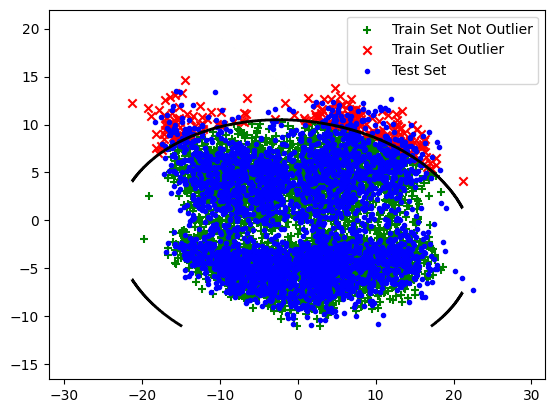

In [11]:
# Stage 3 :: Outlier Detection
# Some motivation for this approach --> since we're trying to maximize 
# r2 score on the test set and we don't have the gt label for the test set
# we only have to consider the points int the training set that are in accordance with 
# the points in the test set, i.e the outliers are the points which are far of the elliptic
# envelope decision boundary

from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

fig, ax = plt.subplots()

pca = PCA(n_components=2)
X_project = pca.fit_transform(X_scaled)
X_test_project = pca.transform(X_test_scaled)


grid_scale = 1.5
ax.set_xlim(left=X_project[:, 0].min()*grid_scale, right=X_project[:, 0].max()*grid_scale)
ax.set_ylim(bottom=X_project[:, 1].min()*grid_scale, top=X_project[:, 1].max()*grid_scale)


# Outlier analysis --> EllipticEnvelope (Gaussian)
xx, yy = np.meshgrid(np.linspace(X_project[:, 0].min(), \
X_project[:, 0].max(), 1000), np.linspace(X_project[:, 1].min(), \
    X_project[:, 1].max(), 1000))

elliptic = EllipticEnvelope(contamination=0.047)
outliers = elliptic.fit_predict(X_project)
mask_outliers_out = outliers != -1
X_project_not_outliers = X_project[mask_outliers_out, :]
X_project_outliers = X_project[~mask_outliers_out, :]

ax.scatter(X_project_not_outliers[:, 0], X_project_not_outliers[:, 1], marker='+', color='green')
ax.scatter(X_project_outliers[:, 0], X_project_outliers[:, 1], marker='x', color='red')
ax.scatter(X_test_project[:, 0], X_test_project[:, 1], marker='.', color='blue')
Z = elliptic.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")
ax.legend(['Train Set Not Outlier', 'Train Set Outlier', 'Test Set'])

plt.show()

In [12]:
X_imputed.shape, y.shape, len(mask_outliers_out), X_index

NameError: name 'X_index' is not defined

In [13]:
# Outlier removal

X_imputed = X_imputed.loc[mask_outliers_out, :]
y = y.loc[mask_outliers_out]

rbc = QuantileTransformer(n_quantiles=X.shape[0], output_distribution='normal')
X_index, X_columns = X.index, X.columns
imputed_data= rbc.fit_transform(X_imputed)
X_imputed = pd.DataFrame(imputed_data, index=X_imputed.index, columns=X_columns)

/Users/sebastianives/Documents/ETH /2024 - 2025/Fall /AML/ethz-aml-project-2/aml2env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (5117) is greater than the total number of samples (4876). n_quantiles is set to n_samples.
  warnings.warn(


In [16]:
def filter_multicolinearity(X_train, sigma): 
    corr_matrix = np.triu(np.corrcoef(X_train, rowvar=False))
    np.fill_diagonal(corr_matrix, val=0)
    mask_multicorr = (corr_matrix < sigma).all(axis=1)
    return mask_multicorr

In [17]:
mask_multicorr = filter_multicolinearity(X_imputed, 0.95)

In [18]:
X_columns = X_imputed.columns 
multi_colinear_columns = X_columns[~mask_multicorr]

In [19]:
multi_colinear_columns

Index(['HeartRatem', 'RRmean', 'mean_nni', 'sdnn', 'sdsd', 'nni_50', 'nni_20',
       'rmssd', 'range_nni', 'cvsd', 'cvnni', 'sd1', 'sd2', 'ratio_sd2_sd1',
       'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
       'HRV_CVSD', 'HRV_MadNN', 'HRV_SDRMSSD', 'HRV_HF', 'HRV_SD1', 'HRV_SD2',
       'HRV_S', 'HRV_CVI', 'HRV_PIP', 'HRV_GI', 'HRV_SI', 'HRV_SD2d',
       'HRV_SD2a', 'HRV_SDNNd', 'HRV_MFDFA_alpha1_Width', 'HRV_CMSEn'],
      dtype='object')

In [20]:
X_filtered_multicorr = X_imputed.loc[:, mask_multicorr]

In [21]:
from sklearn.metrics import f1_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered_multicorr, y, test_size=0.2, shuffle=True)

# <span style ="color: skyblue; font-weight: bold"> Feature Selection</span>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [24]:
tree_clf1 = DecisionTreeClassifier(criterion='entropy', splitter='random').fit(X_train, y_train)

y_pred = tree_clf1.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("\n\nAccuracy:{:,.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:{:,.2f}%".format(precision_score(y_test, y_pred, average="micro")*100))
print("Recall:{:,.2f}%".format(recall_score(y_test, y_pred, average="micro")*100))
print("F1-Score:{:,.2f}%".format(f1_score(y_test, y_pred, average="micro")*100))

feature_importances = pd.DataFrame(tree_clf1.feature_importances_,
                                index = X_train.columns,
                                columns=['importance']).sort_values('importance', 
                                                                    ascending=False)

print(feature_importances)

[[500   8 115   9]
 [ 10  34   9   4]
 [ 99  21 128  12]
 [  9   1  10   7]]


Accuracy:68.55%
Precision:68.55%
Recall:68.55%
F1-Score:68.55%
                              importance
HRV_SD1a                        0.111625
HRV_pNN50                       0.062601
mean_hr                         0.025993
HRV_MedianNN                    0.025499
HRV_CD                          0.022990
...                                  ...
HRV_MFDFA_alpha1_Increment      0.002360
HRV_MFDFA_alpha1_Fluctuation    0.001934
HRV_MFDFA_alpha1_Asymmetry      0.001790
HRV_MFDFA_alpha2_Asymmetry      0.001091
HRV_AI                          0.000671

[105 rows x 1 columns]


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)


y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("\n\nAccuracy:{:,.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision:{:,.2f}%".format(precision_score(y_test, y_pred, average="micro")*100))
print("Recall:{:,.2f}%".format(recall_score(y_test, y_pred, average="micro")*100))
print("F1-Score:{:,.2f}%".format(f1_score(y_test, y_pred, average="micro")*100))

feature_importances = pd.DataFrame(tree_clf1.feature_importances_,
                                index = X_train.columns,
                                columns=['importance']).sort_values('importance', 
                                                                    ascending=False)

csum = feature_importances.cumsum()
relevant_features = list(csum[csum['importance'] <= 0.9].index)

[[589   3  40   0]
 [  3  39  15   0]
 [108   9 142   1]
 [  7   3   9   8]]


Accuracy:79.71%
Precision:79.71%
Recall:79.71%
F1-Score:79.71%


/Users/sebastianives/Documents/ETH /2024 - 2025/Fall /AML/ethz-aml-project-2/aml2env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [26]:
X_selected_ftr = X_filtered_multicorr[relevant_features]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_ftr, y, test_size=0.2, shuffle=True)

In [28]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=2000, n_jobs=-1)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18777
[LightGBM] [Info] Number of data points in the train set: 3900, number of used features: 75
[LightGBM] [Info] Start training from score -0.478449
[LightGBM] [Info] Start training from score -2.648331
[LightGBM] [Info] Start training from score -1.276635
[LightGBM] [Info] Start training from score -3.489608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

In [29]:
f1_score(y_test, y_pred, average='micro')

np.float64(0.8165983606557377)

<span style ="color: yellow; font-weight: bold; font-size: 20px">GPC</span>

In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import *
from scipy.optimize import minimize
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import tqdm

In [58]:
from gpytorch.models import ExactGP
from gpytorch.likelihoods import DirichletClassificationLikelihood
from gpytorch.means import ConstantMean
from gpytorch.kernels import ScaleKernel, RBFKernel
import torch
import math
import torch
import numpy as np
import gpytorch
from matplotlib import pyplot as plt
from torch.optim import LBFGS
import torch.distributed as dist
from torch.nn.parallel import DistributedDataParallel as DDP


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
output_device = torch.device('cuda:0')
X_tr , y_tr = torch.from_numpy(X_train.values).to(output_device), torch.from_numpy(y_train.values).to(output_device)

n_devices = torch.cuda.device_count()
print('Planning to run on {} GPUs.'.format(n_devices))


In [ ]:
# We will use the simplest form of GP model, exact inference
class DirichletGPModel(ExactGP):
    def __init__(self, train_x, train_y, likelihood, num_classes, n_devices):
        super(DirichletGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = ConstantMean(batch_shape=torch.Size((num_classes,)))
        base_covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

        self.covar_module = gpytorch.kernels.MultiDeviceKernel(
            base_covar_module, device_ids=range(n_devices),
            output_device=output_device
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)


# initialize likelihood and model
# we let the DirichletClassificationLikelihood compute the targets for us
likelihood = DirichletClassificationLikelihood(y_tr, learn_additional_noise=True).to(output_device)
model = DirichletGPModel(X_tr, likelihood.transformed_targets, likelihood, num_classes=4 ).to(output_device)

In [ ]:
# this is for running the notebook in our testing framework
import os
smoke_test = ('CI' in os.environ)
training_iter = 2 if smoke_test else 1000


# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(X_tr)
    # Calc loss and backprop gradients
    loss = -mll(output, likelihood.transformed_targets).sum()
    loss.backward()
    if i % 10 == 0:
        print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
            i + 1, training_iter, loss.item(),
            model.covar_module.base_kernel.lengthscale.mean().item(),
            model.likelihood.second_noise_covar.noise.mean().item()
        ))
    optimizer.step()

NotImplementedError: The operator 'aten::linalg_qr.out' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [ ]:
from xgboost import XGBClassifier

xgboost_classification_model = XGBClassifier(n_estimators=2000,n_jobs=-1)
xgboost_classification_model.fit(X_train, y_train, verbose=0)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgboost_classification_model.predict(X_test)

In [ ]:
f1_score(y_test, y_pred, average='micro')

np.float64(0.8203125)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_classifier = HistGradientBoostingClassifier()
hist_classifier.fit(X_train, y_train)
y_pred = hist_classifier.predict(X_test)
f1_score(y_test, y_pred, average='micro')

np.float64(0.8349609375)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered_multicorr, y, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

adaboost = AdaBoostClassifier(n_estimators=2000, algorithm='SAMME')
adaboost_pipeline = Pipeline(
    [('impute', KNNImputer(n_neighbors=5)), 
    ('adaboost', adaboost)]
)
adaboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('impute', KNNImputer()),
                ('adaboost',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=2000))])

In [ ]:
y_pred = adaboost_pipeline.predict(X_test)
f1_score(y_test, y_pred, average='micro')

np.float64(0.7879537953795379)

In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('xgb_class', xgboost_classification_model), 
    ('hist_class', hist_classifier),
    ('lgbm_class', lgbm)
], voting='soft', weights=[0.33, 0.33, 0.33])

voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)
f1_score(y_test, y_pred, average='micro')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25162
[LightGBM] [Info] Number of data points in the train set: 4093, number of used features: 113
[LightGBM] [Info] Start training from score -0.521799
[LightGBM] [Info] Start training from score -2.461962
[LightGBM] [Info] Start training from score -1.247159
[LightGBM] [Info] Start training from score -3.382560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

np.float64(0.8310546875)

In [126]:
data_test = pd.read_csv('test_features.csv', header=0, index_col='id')

In [127]:
X_test = data_test 
X_test.replace(to_replace=np.inf, value=np.nan, inplace=True)

In [128]:
X_test.columns

Index(['PRinterm', 'PRinterstd', 'PRsegm', 'PRsegstd', 'QRSmean', 'QRSstd',
       'QTinterm', 'QTinterstd', 'STsegm', 'STsegstd',
       ...
       'HRV_LZC', 'HRV_DFA_alpha2', 'HRV_MFDFA_alpha2_Width',
       'HRV_MFDFA_alpha2_Peak', 'HRV_MFDFA_alpha2_Mean',
       'HRV_MFDFA_alpha2_Max', 'HRV_MFDFA_alpha2_Delta',
       'HRV_MFDFA_alpha2_Asymmetry', 'HRV_MFDFA_alpha2_Fluctuation',
       'HRV_MFDFA_alpha2_Increment'],
      dtype='object', length=140)

In [129]:
X_test = X_test.loc[:, mask_multicorr]

In [ ]:
X_filtered_multicorr, y = RandomOverSampler().fit_resample(X_filtered_multicorr, y)

In [279]:
voting.fit(X_filtered_multicorr, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25393
[LightGBM] [Info] Number of data points in the train set: 12120, number of used features: 113
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

VotingClassifier(estimators=[('xgb_class',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learn...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=2000, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('hist_class', HistGradientBoostingClassifier()),
                             ('lgbm_class',
                              LGBMClassifier(n_estimators=2000, n_jobs=-1))],
                 voting='soft', weights=[0.33, 0.33, 0.33])

In [281]:
y_test_pred = voting.predict(X_test)

In [282]:
sample_submission = pd.DataFrame(y_test_pred, index=data_test.index, columns=['y'])

In [283]:
sample_submission.to_csv('new_submission.csv')